<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [18]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [19]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [20]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [21]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [22]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


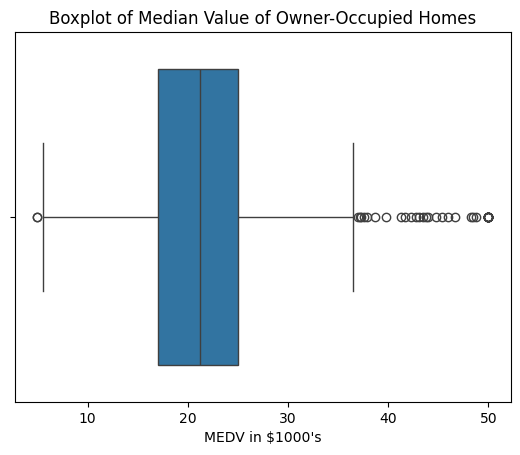

In [23]:
ax = sns.boxplot (x="MEDV", data=boston_df)
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.xlabel("MEDV in $1000's")
plt.show()

    

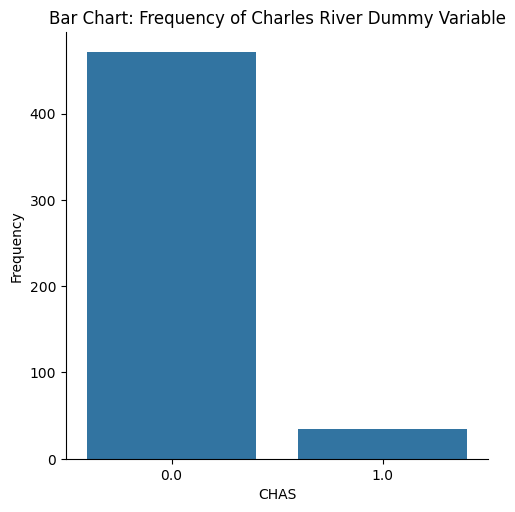

In [24]:
ax = sns.catplot(x="CHAS", kind="count", data=boston_df) 
plt.title("Bar Chart: Frequency of Charles River Dummy Variable")
plt.xlabel("CHAS")
plt.ylabel("Frequency")
plt.show()

In [25]:
boston_df.loc[(boston_df["AGE"]<=35), "age_group"] = "35 years and younger" 
boston_df.loc[(boston_df["AGE"]>35) & (boston_df["AGE"] < 70), "age_group"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"]>=70), "age_group"] = "70 years and older"

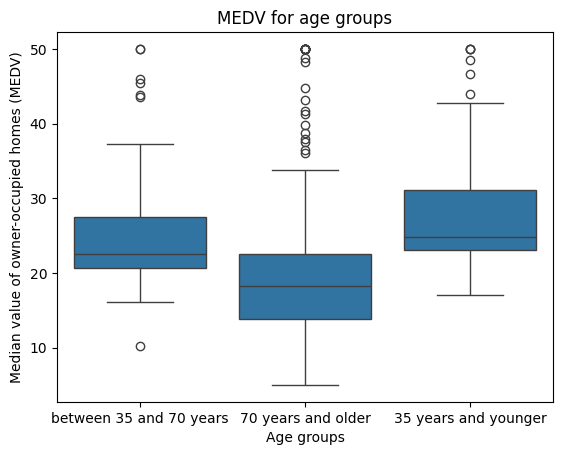

In [26]:
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
plt.title("MEDV for age groups")
plt.xlabel("Age groups")
plt.ylabel("Median value of owner-occupied homes (MEDV)")
plt.show()
                

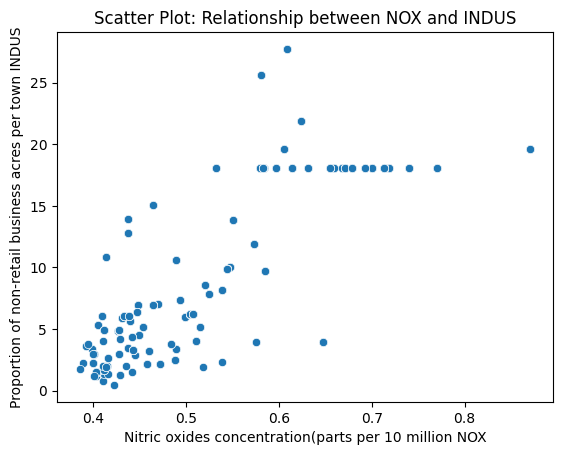

In [27]:
ax = sns.scatterplot (x="NOX", y="INDUS", data=boston_df)
plt.title("Scatter Plot: Relationship between NOX and INDUS")
plt.xlabel("Nitric oxides concentration(parts per 10 million NOX")
plt.ylabel("Proportion of non-retail business acres per town INDUS")
plt.show()

In [28]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [29]:
scipy.stats.levene(boston_df["NOX"], boston_df["INDUS"])
#There is a positive correlation between the 2 values --> high INDUS values correlate with high NOX values and vice versa. 

LeveneResult(statistic=1429.1967673958382, pvalue=1.3743211087863533e-195)

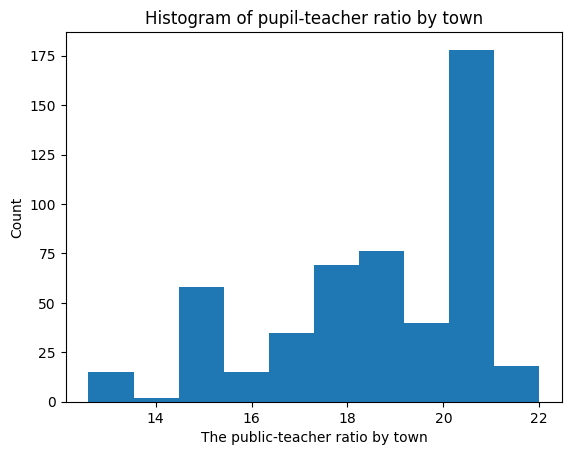

In [30]:
plt.hist(boston_df["PTRATIO"])
plt.xlabel("The public-teacher ratio by town")
plt.ylabel("Count")
plt.title("Histogram of pupil-teacher ratio by town")
plt.show()

In [31]:
print("Null Hypothesis: there is no difference in median value of houses bounded by the Charles river or not")
scipy.stats.levene(boston_df[boston_df["CHAS"] == 0]["MEDV"], boston_df[boston_df["CHAS"]==1]["MEDV"], center="mean")
#since the p-value (0.0032) is less than 0.05 we cannot assume equality of variance. 

Null Hypothesis: there is no difference in median value of houses bounded by the Charles river or not


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [32]:
print("Null Hypothesis: the difference in median value of houses bounded by the Charles river is not significant")
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 0]["MEDV"], boston_df[boston_df["CHAS"] == 1]["MEDV"], equal_var=True)

Null Hypothesis: the difference in median value of houses bounded by the Charles river is not significant


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [33]:
print("As the p-value is less than 0.05, we reject the null hypothesis and say there is a significa difference in the median values")

As the p-value is less than 0.05, we reject the null hypothesis and say there is a significatn difference in the median values


In [ ]:
#ANOVA TEST 

In [53]:
print("Null Hypothesis: there is no difference in median values of houses for each proportion of owner occupied units built priot to 1940.")
print("Alternative: there is a significant difference in median values of houses for each proportion of owner occupied units built priot to 1940.")

Null Hypothesis: there is no difference in median values of houses for each proportion of owner occupied units built priot to 1940.
Alternative: there is a significant difference in median values of houses for each proportion of owner occupied units built priot to 1940.


In [35]:
thirtyfive_lower= boston_df.loc[(boston_df["age_group"] == "35 years and younger")]["MEDV"]
thirtyfive_seventy= boston_df.loc[(boston_df["age_group"] == "between 35 and 70 years")]["MEDV"]
seventy_older = boston_df.loc[(boston_df["age_group"] == "70 years and older")]["MEDV"]

In [36]:
scipy.stats.levene(boston_df[boston_df["age_group"] == "35 years and younger"]["MEDV"],
                   boston_df[boston_df["age_group"] == "between 35 and 70 years"]["MEDV"], 
                   boston_df[boston_df["age_group"] == "70 years and older"]["MEDV"], 
                   center="median")

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

In [87]:
thirtyfive_lower = boston_df[boston_df["age_group"] == "35 years and younger"]["MEDV"]
thirtyfive_seventy = boston_df[boston_df["age_group"] == "between 35 and 70 years"]["MEDV"]
seventy_older = boston_df[boston_df["age_group"] == "70 years and older"]["MEDV"]

In [93]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [37]:
print("As the p-value is less than 0.05, we reject the null hypothesis that suggests there is no significant difference")

As the p-value is less than 0.05, we reject the null hypothesis that suggests there is no significant difference


In [38]:
#Pearson Correlation

In [54]:
print("Null hypothesis: There is no relationship between nitric oxide concentrations and proportion of non-retail business areas.")
print("Alternative: There is a relationship between nitric oxide concentrations and proportion of non-retail business areas.")

Null hypothesis: There is no relationship between nitric oxide concentrations and proportion of non-retail business areas.
Alternative: There is a relationship between nitric oxide concentrations and proportion of non-retail business areas.


In [43]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [45]:
print("As the p-value is less than 0.05, we reject the null hypothesis that means there is no correlation between INDUS and NOX.")

As the p-value is less than 0.05, we reject the null hypothesis that means there is no correlation between INDUS and NOX.


In [46]:
#Regression Analysis

In [47]:
print("Null Hypothesis: Weighted distance to 5 boston employment centers has no impact on the median value of owner occupied homes.")
print("Alternative: Weighted distance to 5 boston employment centers has an impact on th emedian value of owner occupied homes.")

Null Hypothesis: Weighted distance to 5 boston employment centers has no impact on the median value of owner occupied homes.
Alternative: Weighted distance to 5 boston employment centers has an impact on th emedian value of owner occupied homes.


In [57]:
x = boston_df["DIS"]
y = boston_df["MEDV"]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        08:17:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
print("From the last regression test, the p-value is less than 0.05 which means we can reject the null hypothesis and say there is evidence of correlation between median value of owner occupied homes and weighted distance to 5 boston employment centers.")  

From the last regression test, the p-value is less than 0.05 which means we can reject the null hypothesis and say there is evidence of correlation between median value of owner occupied homes and weighted distance to 5 boston employment centers.
